In [1]:
from pkg.utils.rotation_utils import *

In [8]:
Rotation.from_dcm(Rot_axis(1,np.pi/4)).as_quat()

array([0.38268343, 0.        , 0.        , 0.92387953])

In [7]:
Rotation.from_quat([0.70710678,0,0,0.70710678]).as_dcm()

array([[ 1.,  0.,  0.],
       [ 0.,  0., -1.],
       [ 0.,  1.,  0.]])

In [1]:
# from pkg.global_config import *
# import ctypes
# from ctypes import *

# OBJ_MAX = 100
# VTX_MAX = 20
# COL_MAX = 1000

# clib = ctypes.cdll.LoadLibrary(os.path.join(TAMP_ETASL_DIR, "openGJK/lib/libopenGJKlib.so"))
# clib.gjk_flat_batch.restype = ctypes.c_double

# MAX_VTX_ARR_TYPE = c_double * (VTX_MAX * 3)

# class bd(Structure):
#     _fields_ = [("numpoints", c_int),
#                 ("coord", POINTER(c_void_p)),
#                 ("s", c_double*3),
#                ]

# class bd_flt(Structure):
#     _fields_ = [("numpoints", c_int),
#                 ("vtx_flat", MAX_VTX_ARR_TYPE)
#                ]
    
# BD_ARR_TYPE = bd * OBJ_MAX
# BD_FLT_ARR_TYPE = bd_flt * OBJ_MAX

# bd_flt_arr = BD_FLT_ARR_TYPE()

# def assign_points_c_bd(bd_flt_arr, points_arr):
#     for bd_flt, points in zip(bd_flt_arr, points_arr):
#         bd_flt.numpoints = len(points)
#         bd_flt.vtx_flat = MAX_VTX_ARR_TYPE(*points.flatten().tolist())
        
# def get_distance_batch(points_arr, idx1, idx2):
#     assign_points_c_bd(bd_flt_arr, points_arr)
#     len_obj = len(points_arr)
#     len_col = len(idx1)
#     dist_arr = (c_double*len_col)()
#     clib.gjk_flat_batch(bd_flt_arr, c_int(len_obj), 
#                         (c_int*len_col)(*idx1), (c_int*len_col)(*idx2), 
#                         c_int(len_col), cast(dist_arr, POINTER(c_double)))
#     return np.array(dist_arr)

In [2]:
1

1

In [1]:
from pkg.gjk import *

In [2]:
points = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            points.append((i,j,k))
points = np.array(points)

points1 = points.copy()
points2 = points + 2

points_arr = [points1, points2]

In [3]:
vtx_list = np.load("vtx_list.npy", allow_pickle=True).tolist()
radius_list = np.load("radius_list.npy")
idx1_list = np.load("idx1_list.npy")
idx2_list = np.load("idx2_list.npy")

In [4]:
to_idx = len(vtx_list)

In [5]:
vtx_list_to = vtx_list[:to_idx]

In [6]:
vtx_list_to.append(vtx_list_to[0])

In [7]:
idx1_list_to = [idx1 for idx1, idx2 in zip(idx1_list, idx2_list) if idx1<to_idx and idx2<to_idx]
idx2_list_to = [idx2 for idx1, idx2 in zip(idx1_list, idx2_list) if idx1<to_idx and idx2<to_idx]

In [8]:
idx1_list_to = np.array(idx1_list_to)
idx2_list_to = np.array(idx2_list_to)

In [9]:
# def assign_points_c_bd(bd_flt_arr, points_arr):
bd_flt_arr, points_arr = bd_flt_arr, vtx_list_to
for bd_flt, points in zip(bd_flt_arr, points_arr):
    bd_flt.numpoints = len(points)
    bd_flt.vtx_flat = MAX_VTX_ARR_TYPE(*points.flatten().tolist())

In [10]:
points_arr, idx1, idx2 = vtx_list_to, idx1_list_to, idx2_list_to
len_obj = len(points_arr)
len_col = len(idx1)
dist_arr = (c_double * len_col)()
clib.gjk_flat_batch(bd_flt_arr, c_int(len_obj),
                    (c_int * len_col)(*idx1), (c_int * len_col)(*idx2),
                    c_int(len_col), cast(dist_arr, POINTER(c_double)))

0.0

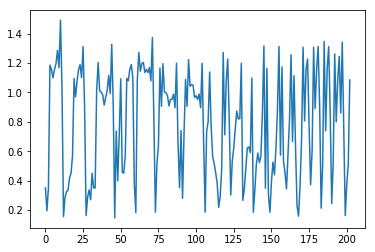

In [13]:
import matplotlib.pyplot as plt
plt.plot(dist_arr)

In [22]:
np.where(idx2_list_to == 0)

(array([25]),)

In [21]:
np.where(idx1_list_to == 0)

(array([41, 42, 43, 44, 45, 46, 47, 48]),)

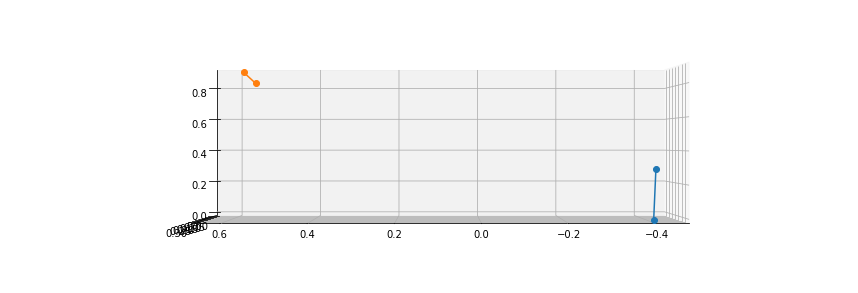

In [29]:

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mplot3d

fig = plt.figure(figsize=(15, 5))

sub = fig.add_subplot(1, 1, 1, projection="3d")
ii = 45
x, y, z = np.transpose(vtx_list_to[idx1_list_to[ii]])
sub.plot(x, y, z, '-o')
x, y, z = np.transpose(vtx_list_to[idx2_list_to[ii]])
sub.plot(x, y, z, '-o')
sub.view_init(0, 90)

In [19]:
import time
t1 = time.time()
res = get_distance_batch(vtx_list_to, idx1_list_to, idx2_list_to)
t2 = time.time()
print("{} ms".format((t2-t1)*1000))

0.494956970215 ms


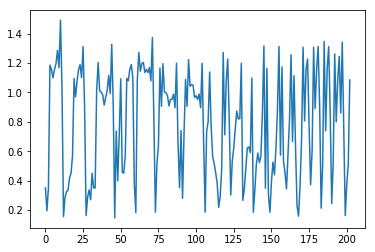

In [20]:
import matplotlib.pyplot as plt
plt.plot(res)

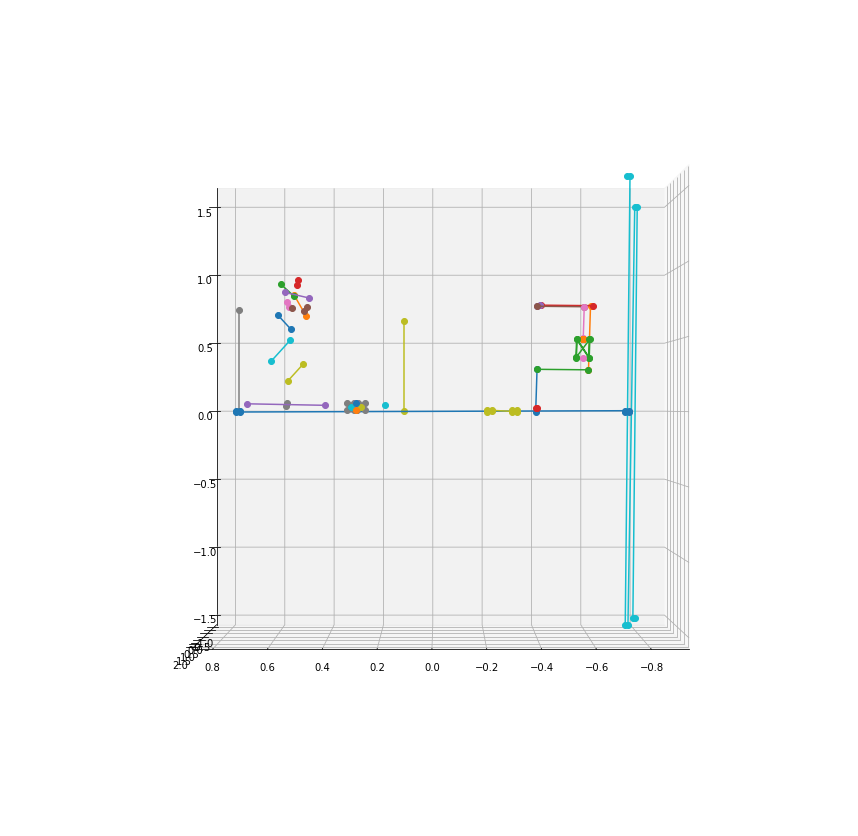

In [26]:

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mplot3d

fig = plt.figure(figsize=(15, 15))

sub = fig.add_subplot(1, 1, 1, projection="3d")
for vtx in vtx_list:
    x, y, z = np.transpose(vtx)
    sub.plot(x, y, z, '-o')
    sub.view_init(0, 90)

In [3]:
import time

In [16]:
t1 = time.time()
res = get_distance_batch(points_arr*10, np.arange(100)%10, (np.arange(100))%10)
t2 = time.time()
print("{} ms".format((t2-t1)*1000))

1.82700157166 ms


In [17]:
print(res)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [12]:
dist_arr[0]

1.7320508075688772